## Load MNIST on Python 3.x

In [1]:
import pickle
import gzip
import matplotlib.pyplot as plt

In [2]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

# Load USPS on Python 3.x

In [3]:
from PIL import Image
import os
import numpy as np
from sklearn import metrics

In [4]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

In [5]:
training_raw_data = training_data[0]
training_output = training_data[1]

validation_raw_data = validation_data[0]
validation_output = validation_data[1]

test_raw_data = test_data[0]
test_output = test_data[1]

# Logistic Regression

In [6]:
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

In [7]:
def one_hot_encode(training_output):
    target = []
    for i in training_output:
        array = np.zeros(10)
        array[i] = 1
        target.append(array)
    return np.array(target)

In [8]:
X = training_raw_data

In [9]:
target = one_hot_encode(training_output)

In [10]:
def apply_gradient_descent(W,lamb):
    activation = np.matmul(X,W)
    y = softmax(activation)
    loss = (-1/X.shape[0]) * np.sum(target * np.log(y)) + (lamb/2)*np.sum(W*W) 
    gradient =(-1/X.shape[0]) * np.dot(X.T,(target - y)) + lamb*W
    return loss,gradient

In [11]:
def getAccuracy(X,Y,W):
    prediction = np.argmax(softmax(np.dot(X,W)),axis=1)
    matching = sum(prediction == Y)
    accuracy = matching /(float(len(Y)))
    return accuracy

In [49]:
def train_logistic_accuracy():
    learning_rate = 0.1
    lamb = 0.1
    loss_arr = []
    W = np.zeros((784, 10))
    for i in range(250):
        loss,grad = apply_gradient_descent(W,lamb)
        loss_arr.append(loss)
        W = W - (learning_rate * grad)
    return W,loss_arr


In [50]:
W,loss_array = train_logistic_accuracy()

training_accuracy :0.85776
validation_accuracy :0.8747
testing_accuracy :0.8697
USPS accuracy :0.3352667633381669
MNIST Confusion Matrix :
[[ 948    0    2    3    0    2   16    1    8    0]
 [   0 1100    4    3    1    1    4    0   22    0]
 [  15   26  845   25   19    0   28   22   45    7]
 [   5    4   20  890    1   24    8   19   25   14]
 [   3   10    5    0  861    0   16    2   10   75]
 [  28   19    4   95   21  623   30    9   46   17]
 [  20    5   13    2   13   17  883    0    5    0]
 [   4   41   24    1   13    0    4  888    9   44]
 [  11   27   13   40   11   18   17   15  801   21]
 [  16   14   10   13   51    9    2   27    9  858]]
USPS Confusion Matrix :
[[ 715    5  398   49  330   39   73   36   89  266]
 [ 288  305  156  266  281   31   47  289  323   14]
 [ 291   44 1116  123   75   38  107   99   89   17]
 [ 169    4  140 1157   46  172   49   76  121   66]
 [ 130  105   37   51 1093   85   26  121  246  106]
 [ 255   26  223  244   58  822  150   83

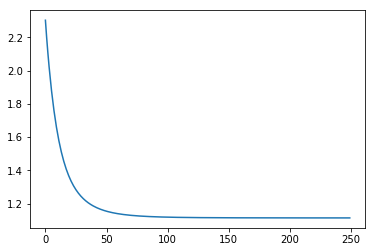

In [51]:
training_accuracy = getAccuracy(training_raw_data,training_output,W)
validation_accuracy = getAccuracy(validation_raw_data,validation_output,W)
testing_accuracy = getAccuracy(test_raw_data,test_output,W)

mnist_pred = np.argmax(softmax(np.dot(test_raw_data,W)),axis=1)
mnist_metrix =  metrics.confusion_matrix(test_output, mnist_pred, labels=None, sample_weight=None)
usps_accuracy = getAccuracy(USPSMat,USPSTar,W)
usps_prediction = np.argmax(softmax(np.dot(USPSMat,W)),axis=1)
usps_metrix =  metrics.confusion_matrix(USPSTar, usps_prediction, labels=None, sample_weight=None)
plt.plot(loss_array)
print("training_accuracy :"+ str(training_accuracy))
print("validation_accuracy :"+ str(validation_accuracy))
print("testing_accuracy :"+ str(testing_accuracy))
print("USPS accuracy :"+ str(usps_accuracy))
print("MNIST Confusion Matrix :")
print(mnist_metrix)
print("USPS Confusion Matrix :")
print(usps_metrix)

Neural Network

In [22]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
(x_tra, y_tra), (x_te, y_te) = mnist.load_data()
num_classes=10
image_vector_size=28*28
x_train = x_tra.reshape(x_tra.shape[0], image_vector_size)
x_test = x_te.reshape(x_te.shape[0], image_vector_size)
y_train = keras.utils.to_categorical(y_tra, num_classes)
y_test = keras.utils.to_categorical(y_te, num_classes)
image_size = 784 
model = Sequential()
model.add(Dense(units=64, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=False,validation_split=.1)
nt_loss,accuracy = model.evaluate(x_test, y_test, verbose=False)
nt_mnist_pred = model.predict_classes( x_test, batch_size=128, verbose=1)
nt_metrix =  metrics.confusion_matrix(y_te, nt_mnist_pred, labels=None, sample_weight=None)

/Users/dhayanidhigunasekaran/anaconda/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


10000/10000 [==============================] - 1s 88us/step


In [23]:
USPSMat_test = np.array(USPSMat)
USPSMat_test = USPSMat_test.reshape(USPSMat_test.shape[0], image_vector_size)
USPSTar_cat = keras.utils.to_categorical(USPSTar, num_classes)

In [24]:
nt_usps_loss,nt_usps_accuracy = model.evaluate(USPSMat_test, USPSTar_cat, verbose=False)

In [25]:
val_pred = model.predict_classes(USPSMat_test, batch_size=128, verbose=1)
metrix =  metrics.confusion_matrix(USPSTar, val_pred, labels=None, sample_weight=None)

19999/19999 [==============================] - 2s 87us/step


In [26]:
print("Neural Network")
print("MNIST Accuracy:"+ str(accuracy))
print("USPS Accuracy:"+str(nt_usps_accuracy))
print("MNIST Confusion Matrix")
print(nt_metrix)
print("USPS Confusion matrix")
print(metrix)

Neural Network
MNIST Accuracy:0.9214
USPS Accuracy:0.29496474822847074
MNIST Confusion Matrix
[[ 951    0    3    2    2    6   11    1    4    0]
 [   0 1103    3    4    0    0    4    1   18    2]
 [   9    1  932   17   11    6   10   15   29    2]
 [   3    0   23  922    0   26    1   11   16    8]
 [   1    4    4    0  895    1   11    1    3   62]
 [  11    2    4   47    7  776   11    5   20    9]
 [  16    3    7    1   12   13  900    1    5    0]
 [   3   10   22    7    6    0    0  943    5   32]
 [  12    3    6   22    8   23   10   12  871    7]
 [  14    0    2   12   22   10    1   19    8  921]]
USPS Confusion matrix
[[ 765    0  523   44   81  199    7   45   30  306]
 [ 187   66 1040  295    4  138    1  250   11    8]
 [ 131    0 1633   59    9  136    0   14   12    5]
 [ 130    0  392 1091    0  349    1   27    5    5]
 [ 158   23  318   82  554  317    1  227  145  175]
 [ 169    4  384  121    4 1267    3   30   12    6]
 [ 377    0 1140   23   36  303   9

In [27]:
# SVM & RandomForest
from sklearn.svm import SVC
classifier1 = SVC(kernel='rbf', C=2, gamma = 0.05)
classifier1.fit(training_raw_data, training_output)
validation_pred_svc = classifier1.predict(validation_raw_data)
svc_metrix =  metrics.confusion_matrix(validation_output, validation_pred_svc, labels=None, sample_weight=None)
svc_accuracy = classifier1.score(validation_raw_data, validation_output,sample_weight=None)

validation_pred_svc_usps = classifier1.predict(USPSMat)
svc_metrix_usps =  metrics.confusion_matrix(USPSTar, validation_pred_svc_usps, labels=None, sample_weight=None)

svc_usps_accuracy = classifier1.score(USPSMat, USPSTar,sample_weight=None)
print("SVM")
print("MNIST accuracy:"+ str(svc_accuracy))
print("USPS Accuracy:"+ str(svc_usps_accuracy))
print("MNIST Confustion matrix")
print(svc_metrix)
print("USPS Confusion matrix")
print(svc_metrix_usps)

SVM
MNIST accuracy:0.9835
USPS Accuracy:0.2614130706535327
MNIST Confustion matrix
[[ 982    0    5    0    0    0    1    0    1    2]
 [   0 1056    1    2    0    0    2    1    2    0]
 [   1    0  980    0    0    1    0    3    5    0]
 [   0    0    3 1007    0    6    0    1   11    2]
 [   0    5    0    0  969    0    0    1    2    6]
 [   2    0    3   10    2  887    4    1    5    1]
 [   2    0    0    0    1    1  963    0    0    0]
 [   0    6    5    0    1    0    0 1071    0    7]
 [   1    0    4    4    0    3    1    0  995    1]
 [   2    3    2    7    8    3    0    5    6  925]]
USPS Confusion matrix
[[ 226    0 1564    2   26   35    2    0   79   66]
 [  78  257  713  172  262   77   12  337   88    4]
 [   8    0 1944    6    2   20    1    6   11    1]
 [   4    0 1193  725    0   41    0    0   37    0]
 [   6    0 1045   18  522   96    0   56  252    5]
 [  15    0 1305   16    1  626    0    0   37    0]
 [  78    0 1534    2   10   61  290    0   22

In [28]:
from sklearn.ensemble import RandomForestClassifier
#RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=10)
classifier2.fit(training_raw_data, training_output)
validation_pred_rf = classifier2.predict(validation_raw_data)
rf_metrix =  metrics.confusion_matrix(validation_output, validation_pred_rf, labels=None, sample_weight=None)
rf_accuracy = classifier2.score(test_raw_data, test_output,sample_weight=None)
validation_pred_rf_usps = classifier2.predict(USPSMat)
rf_metrix_usps =  metrics.confusion_matrix(USPSTar, validation_pred_rf_usps, labels=None, sample_weight=None)
rf_usps_accuracy = classifier2.score(USPSMat, USPSTar,sample_weight=None)
print("Random Forest")
print("MNIST accuracy:"+ str(rf_accuracy))
print("USPS Accuracy:"+ str(rf_usps_accuracy))
print("MNIST Confustion matrix")
print(rf_metrix)
print("USPS Confusion matrix")
print(rf_metrix_usps)

/Users/dhayanidhigunasekaran/anaconda/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Random Forest
MNIST accuracy:0.9455
USPS Accuracy:0.31401570078503926
MNIST Confustion matrix
[[ 978    0    1    2    1    0    2    0    5    2]
 [   0 1049    7    4    0    1    1    1    0    1]
 [   4    1  954    4    3    1    2   12    6    3]
 [   3    1   11  971    1   17    0    3   18    5]
 [   2    3    4    3  931    3    6    2    6   23]
 [   9    0    5   44    3  828   11    1    9    5]
 [   3    2    2    0    5    6  945    0    3    1]
 [   2    9   13    3    6    1    1 1045    1    9]
 [   3    8   12   21    3   18    4    6  922   12]
 [   5    0    2   13   21   12    4   12    7  885]]
USPS Confusion matrix
[[ 730   36  282   80  322  172   91  123   22  142]
 [ 111  582  208  145  140   60   64  652   26   12]
 [ 195  146 1038  133   62  147   60  163   22   33]
 [ 109   70  278  973   67  315   20   98   19   51]
 [  77  207  163   88  793  156   53  311   59   93]
 [ 271   74  221  233   59  927   50  122   21   22]
 [ 431  103  355  115  131  235  50

In [33]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
NN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1)
eclf = VotingClassifier(estimators=[ ('SVM', classifier1), ('RF', classifier2),('NN',NN),('logis',clf1)], voting='hard')

eclf.fit(training_raw_data,training_output)
eclf.score(test_raw_data,test_output)

/Users/dhayanidhigunasekaran/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9593

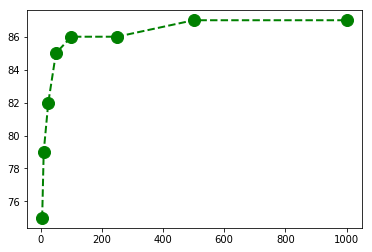

In [52]:
m_value = [5,10,25,50,100,250,500,1000]
erm_m = [75,79,82,85,86,86,87,87]
plt.plot(m_value,erm_m,'go--', linewidth=2, markersize=12)

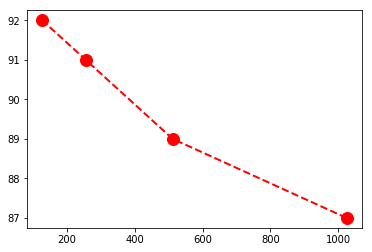

In [53]:
batch = [1024,512,256,128]
acc = [87,89,91,92]
plt.plot(batch,acc,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)

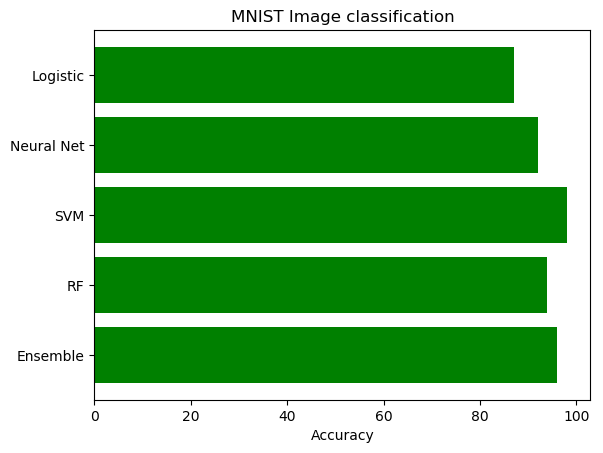

In [55]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Logistic', 'Neural Net', 'SVM', 'RF','Ensemble')
y_pos = np.arange(len(people))
performance = (87,92,98,94,96)

ax.barh(y_pos, performance, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy')
ax.set_title('MNIST Image classification')

plt.show()